In [72]:
%matplotlib inline

In [73]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist

In [139]:
def get_mean(row, j):
    return row[j:min((j + 5), len(row) - 1)].mean()

In [142]:
def get_cropped(img):
    img_new = img.copy()
    for rot in range(4):
        print("Rotation %d..." % rot)
        import sys
        sys.stdout.flush()
        img_new = np.rot90(img_new, 1)
        num_iter = 0
        max_j = 0
        for i, row in enumerate(img_new):
            num_iter += 1
            mean = get_mean(row, 0)
            max_mean = mean
            min_mean = mean
            j = 0
            k = 0
            while mean >= 0.8:
                mean = get_mean(row, j)
                if mean > max_mean:
                    max_mean = mean
                j += 1
            mean = get_mean(row, 0)
            while mean < 0.05:
                mean = get_mean(row, k)
                if mean < min_mean:
                    min_mean = mean
                k += 1
            j = max(j, k)
            if j > max_j and j < img_new.shape[1] / 2:
                max_j = j
        print("Cropping to %d" % max_j)
        img_new = img_new[max_j:]
    return img_new

In [95]:
img = imread("images/DX/59026-DX.png")
img = equalize_hist(img)
img = rgb2gray(img)

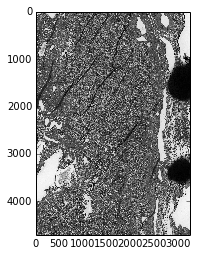

In [99]:
imshow(img)

Rotation 0...
Cropping to 134
Rotation 1...
Cropping to 321
Rotation 2...
Cropping to 0
Rotation 3...
Cropping to 10


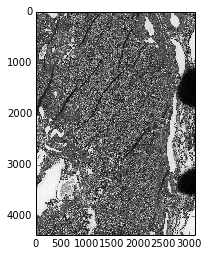

In [143]:
imshow(get_cropped(img))